# Typical El Nino and La Nina Rainfall Patterns (DJF)
1. Calculate Nino3.4 index
2. Calculate seasonal precip for DJF
3. Define El Nino year and La Nina year from nino3.4 anomalies
4. Take average of all El Nino years, La Nina years, and neutral years from precip dataset
5. Plot respective rainfall patterns

In [1]:
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Read in datasets
ersst_ds = xr.open_dataset('/g/data/eg3/jxb548/OBSDATA/ersstv5.1854_2019.nc')
awap_ds = xr.open_dataset('/g/data/eg3/jxb548/OBSDATA/rr_monthly_0.25.1900-2015.nc')

In [3]:
awap_ds

<xarray.Dataset>
Dimensions:    (lat: 139, lon: 178, time: 1392)
Coordinates:
  * time       (time) datetime64[ns] 1900-01-16T12:00:00 ... 2015-12-16T12:00:00
  * lon        (lon) float64 112.0 112.2 112.5 112.8 ... 155.5 155.8 156.0 156.2
  * lat        (lat) float64 -44.5 -44.25 -44.0 -43.75 ... -10.5 -10.25 -10.0
Data variables:
    ndays      (time) float32 ...
    file_date  (time) float64 ...
    nstation   (time) float64 ...
    rr         (time, lat, lon) float32 ...
Attributes:
    CDI:                       Climate Data Interface version 1.9.2 (http://m...
    Conventions:               CF-1.6
    history:                   Thu Mar 08 10:26:24 2018: cdo -L -f nc mergeti...
    source:                    National Climate Centre Archives
    institution:               Bureau Of Meteorology
    title:                     AWAP Gridded Rainfall
    scale:                     250.0
    version:                   2.0
    nco_openmp_thread_number:  1
    CDO:                       Climate Data Operators version 1.9.2 (http://m...

In [4]:
#Select varaibles
sst = ersst_ds.sst
precip = awap_ds.rr

In [5]:
#Calculate ersst Nino3.4 index (Not normalised, just anom)
nino_region = sst.sel(lat=slice(5,-5), lon=slice(190,240))
nino_clim = nino_region.sel(time=slice('1950-01', '1979-12')).mean(dim='time')
nino_anom = (nino_region - nino_clim).mean(dim='lat').mean(dim='lon')

In [6]:
#Make datasets the same size
nino34 = nino_anom.sel(time=slice('1900-01', '2015-12'))

In [7]:
seasonyear = (precip.time.dt.year + (precip.time.dt.month//12))
precip.coords['seasonyear'] = seasonyear
seasonyear2 = (nino34.time.dt.year + (nino34.time.dt.month//12))
nino34.coords['seasonyear'] = seasonyear2

In [8]:
def seasonal_mean(data):
    return data.groupby('time.season').mean()

In [9]:
yearly_seasonal_precip = precip.groupby('seasonyear').apply(seasonal_mean)
yearly_seasonal_nino34 = nino34.groupby('seasonyear').apply(seasonal_mean)

In [10]:
nino34_djf = yearly_seasonal_nino34.sel(season='DJF')

In [11]:
elnino = nino34_djf.where(nino34_djf > 0.5, drop = True)

In [12]:
elnino

<xarray.DataArray 'sst' (seasonyear: 26)>
array([1.1158807 , 1.2014624 , 0.560714  , 0.92943144, 0.685808  ,
       1.0014993 , 1.1356095 , 0.9672284 , 0.9417611 , 1.8146597 ,
       1.4496874 , 0.65807277, 1.0225964 , 0.84285706, 1.6216478 ,
       2.0879076 , 1.0608298 , 0.64472467, 1.6914152 , 0.9394805 ,
       2.1664717 , 0.8095398 , 0.52560395, 0.5976629 , 1.4366037 ,
       2.5562499 ], dtype=float32)
Coordinates:
    season      <U3 'DJF'
  * seasonyear  (seasonyear) int64 1900 1903 1905 1912 ... 2005 2007 2010 2016

In [13]:
lanina = nino34_djf.where(nino34_djf < -0.5, drop = True)

In [14]:
lanina

<xarray.DataArray 'sst' (seasonyear: 56)>
array([-1.8048941 , -1.288555  , -1.7657776 , -1.913238  , -1.476391  ,
       -0.869791  , -1.159756  , -2.5310109 , -1.1800376 , -1.1255305 ,
       -1.2931525 , -1.91703   , -0.95602435, -0.8114745 , -1.0633997 ,
       -1.0107374 , -1.6466993 , -0.76038617, -0.6575821 , -0.92973834,
       -1.0712065 , -1.7215008 , -2.2416928 , -0.62078834, -0.9856779 ,
       -0.7107851 , -0.7633863 , -1.9821337 , -1.2750335 , -1.132879  ,
       -1.4698404 , -0.6045115 , -0.65399665, -0.8088422 , -1.0059248 ,
       -0.69259757, -0.92203313, -1.6040411 , -0.9286588 , -2.0597768 ,
       -0.7642532 , -1.7972254 , -0.6911123 , -1.1358119 , -0.6491226 ,
       -1.8582205 , -0.9444609 , -0.5757759 , -1.6213255 , -1.7374159 ,
       -0.81720614, -0.8957433 , -1.7009703 , -0.90509623, -1.4758748 ,
       -0.9243466 ], dtype=float32)
Coordinates:
    season      <U3 'DJF'
  * seasonyear  (seasonyear) int64 1904 1907 1909 1910 ... 2008 2009 2011 2012

In [15]:
neutral = nino34_djf.where((nino34_djf > -0.5) & (nino34_djf < 0.5), drop = True)

In [16]:
neutral

<xarray.DataArray 'sst' (seasonyear: 35)>
array([ 0.0765973 , -0.428118  ,  0.48251495, -0.43330923,  0.46851757,
       -0.25335768,  0.29182437, -0.2679139 , -0.00551894,  0.32223597,
        0.4733158 , -0.08977446,  0.02924342,  0.08176639, -0.05073839,
        0.30479947,  0.2557683 , -0.45440745, -0.36254072,  0.2282293 ,
        0.48000622,  0.4553983 , -0.1988837 ,  0.36151513, -0.37965146,
       -0.13907136, -0.03121118,  0.32597044,  0.07329479,  0.04303357,
       -0.25903508,  0.2556144 , -0.490065  , -0.48245695,  0.48803258],
      dtype=float32)
Coordinates:
    season      <U3 'DJF'
  * seasonyear  (seasonyear) int64 1901 1902 1906 1908 ... 2004 2013 2014 2015

In [17]:
precip_djf = yearly_seasonal_precip.sel(season='DJF')

In [18]:
nino_pattern = precip_djf.where(precip_djf.seasonyear.isin(elnino.seasonyear.values), drop = True).mean(dim='seasonyear')
nina_pattern = precip_djf.where(precip_djf.seasonyear.isin(lanina.seasonyear.values), drop = True).mean(dim='seasonyear')
neutral_pattern = precip_djf.where(precip_djf.seasonyear.isin(neutral.seasonyear.values), drop = True).mean(dim='seasonyear')

Text(0.5, 1.0, 'El Nino')

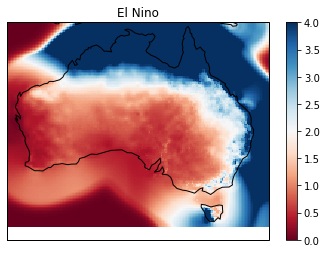

In [19]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([112, 156.2, -44.5, -10])
im = ax.pcolormesh(nino_pattern.lon, nino_pattern.lat, nino_pattern, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(0, 4)
plt.colorbar(im, ax=ax)
ax.set_title('El Nino')

Text(0.5, 1.0, 'La Nina')

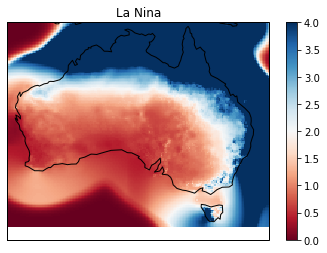

In [20]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([112, 156.2, -44.5, -10])
im = ax.pcolormesh(nina_pattern.lon, nina_pattern.lat, nina_pattern, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(0, 4)
plt.colorbar(im, ax=ax)
ax.set_title('La Nina')

Text(0.5, 1.0, 'Neutral')

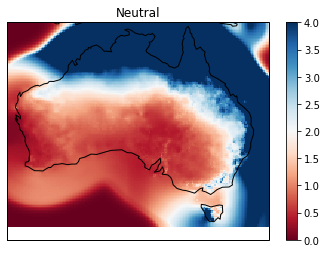

In [21]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([112, 156.2, -44.5, -10])
im = ax.pcolormesh(neutral_pattern.lon, neutral_pattern.lat, neutral_pattern, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(0, 4)
plt.colorbar(im, ax=ax)
ax.set_title('Neutral')

In [22]:
mean = precip_djf.mean(dim='seasonyear')

In [23]:
nino_dif = nino_pattern - mean
nina_dif = nina_pattern - mean

Text(0.5, 1.0, 'El Nino Dif')

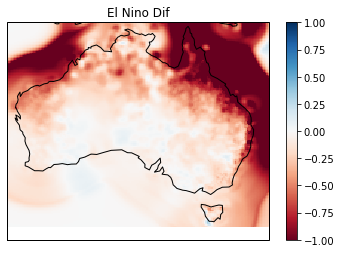

In [24]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([112, 156.2, -44.5, -10])
im = ax.pcolormesh(nino_dif.lon, nino_dif.lat, nino_dif, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-1, 1)
plt.colorbar(im, ax=ax)
ax.set_title('El Nino Dif')

Text(0.5, 1.0, 'La Nina Dif')

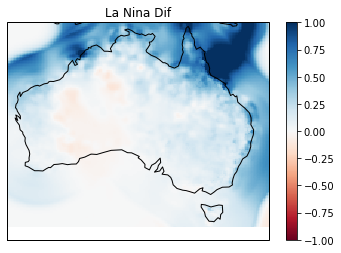

In [25]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([112, 156.2, -44.5, -10])
im = ax.pcolormesh(nina_dif.lon, nina_dif.lat, nina_dif, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-1, 1)
plt.colorbar(im, ax=ax)
ax.set_title('La Nina Dif')

In [26]:
nmn = nino_pattern - nina_pattern

In [27]:
nino_precip = precip_djf.where(precip_djf.seasonyear.isin(elnino.seasonyear.values), drop = True)
nina_precip = precip_djf.where(precip_djf.seasonyear.isin(lanina.seasonyear.values), drop = True)
neutral_precip = precip_djf.where(precip_djf.seasonyear.isin(neutral.seasonyear.values), drop = True)

In [28]:
nino_precip

<xarray.DataArray 'rr' (seasonyear: 26, lat: 139, lon: 178)>
array([[[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         2.2765970e-02, 1.2744010e-02, 8.6318469e-03],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         2.6648536e-02, 1.5068255e-02, 7.3905401e-03],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         3.0775454e-02, 1.7575208e-02, 8.8982591e-03],
        ...,
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

       [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         4.5497298e-02, 2.5533110e-02, 1.7274054e-02],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         5.3183291e-02, 3.0107563e-02, 1.4725048e-02],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         6.1400581e-02, 3.4963127e-02, 1.7689323e-02],
        ...,
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

       [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         5.6120012e-02, 3.1396240e-02, 2.1311516e-02],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         6.5313689e-02, 3.6862280e-02, 1.8168496e-02],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         7.5015448e-02, 4.2694908e-02, 2.1586075e-02],
        ...,
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

       ...,

       [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         5.3713951e+00, 5.4780965e+00, 5.5766692e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         5.3504128e+00, 5.4586945e+00, 5.5662141e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         5.3318181e+00, 5.4416900e+00, 5.5509090e+00],
        ...,
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         1.4569188e-04, 1.0522764e-04, 7.2768387e-05],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         8.8085311e-05, 6.4140040e-05, 4.4660312e-05],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         5.1579002e-05, 3.7817699e-05, 3.5546171e-05]],

       [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         4.8905687e+00, 4.9929457e+00, 5.1031003e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         4.9158969e+00, 5.0207314e+00, 5.1243777e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         4.9432988e+00, 5.0506802e+00, 5.1569448e+00],
        ...,
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         6.6922497e-05, 4.8785205e-05, 3.4022069e-05],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         3.7998117e-05, 2.8104094e-05, 1.9838546e-05],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         2.0636915e-05, 1.5503267e-05, 1.4878310e-05]],

       [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         2.3667312e+00, 2.3905666e+00, 2.4119382e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         2.3424380e+00, 2.3665471e+00, 2.3902631e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         2.3183959e+00, 2.3426967e+00, 2.3665862e+00],
        ...,
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         6.052641

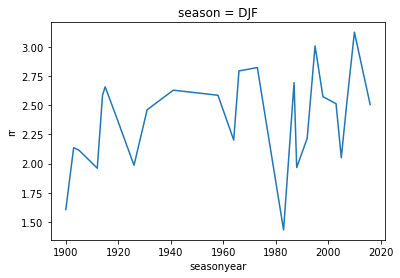

In [29]:
nino_precip.mean(dim='lat').mean(dim='lon').plot()

In [30]:
nino_precip.mean()

<xarray.DataArray 'rr' ()>
array(2.3977299, dtype=float32)
Coordinates:
    season   <U3 'DJF'

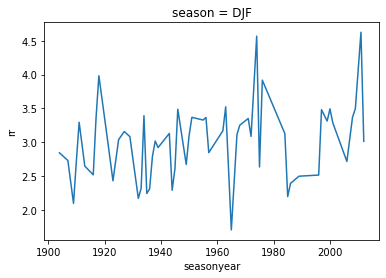

In [31]:
nina_precip.mean(dim='lat').mean(dim='lon').plot()

In [32]:
nina_precip.mean()

<xarray.DataArray 'rr' ()>
array(3.0013154, dtype=float32)
Coordinates:
    season   <U3 'DJF'

### Repeat above but with different nino3.4 thresholds to try and get a stronger signal. Aim for approx 10 el nino and 10 La Nina events. 

In [33]:
elnino2 = nino34_djf.where(nino34_djf > 1, drop = True)
lanina2 = nino34_djf.where(nino34_djf < -1, drop = True)

In [34]:
elnino2

<xarray.DataArray 'sst' (seasonyear: 14)>
array([1.1158807, 1.2014624, 1.0014993, 1.1356095, 1.8146597, 1.4496874,
       1.0225964, 1.6216478, 2.0879076, 1.0608298, 1.6914152, 2.1664717,
       1.4366037, 2.5562499], dtype=float32)
Coordinates:
    season      <U3 'DJF'
  * seasonyear  (seasonyear) int64 1900 1903 1915 1919 ... 1992 1998 2010 2016

In [35]:
lanina2

<xarray.DataArray 'sst' (seasonyear: 31)>
array([-1.8048941, -1.288555 , -1.7657776, -1.913238 , -1.476391 ,
       -1.159756 , -2.5310109, -1.1800376, -1.1255305, -1.2931525,
       -1.91703  , -1.0633997, -1.0107374, -1.6466993, -1.0712065,
       -1.7215008, -2.2416928, -1.9821337, -1.2750335, -1.132879 ,
       -1.4698404, -1.0059248, -1.6040411, -2.0597768, -1.7972254,
       -1.1358119, -1.8582205, -1.6213255, -1.7374159, -1.7009703,
       -1.4758748], dtype=float32)
Coordinates:
    season      <U3 'DJF'
  * seasonyear  (seasonyear) int64 1904 1907 1909 1910 ... 1999 2000 2008 2011

In [36]:
nino_pattern2 = precip_djf.where(precip_djf.seasonyear.isin(elnino2.seasonyear.values), drop = True).mean(dim='seasonyear')
nina_pattern2 = precip_djf.where(precip_djf.seasonyear.isin(lanina2.seasonyear.values), drop = True).mean(dim='seasonyear')

Text(0.5, 1.0, 'El Nino')

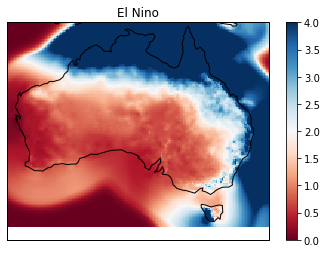

In [37]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([112, 156.2, -44.5, -10])
im = ax.pcolormesh(nino_pattern2.lon, nino_pattern2.lat, nino_pattern2, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(0, 4)
plt.colorbar(im, ax=ax)
ax.set_title('El Nino')

Text(0.5, 1.0, 'La Nina')

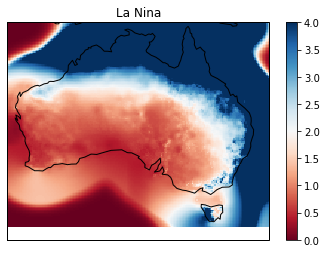

In [38]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([112, 156.2, -44.5, -10])
im = ax.pcolormesh(nina_pattern2.lon, nina_pattern2.lat, nina_pattern2, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(0, 4)
plt.colorbar(im, ax=ax)
ax.set_title('La Nina')

### Try only using events from post 1950

In [39]:
nino34_djf_post_1950 = yearly_seasonal_nino34.sel(season='DJF').sel(seasonyear=slice(1950, 2016))
precip_djf_post_1950 = yearly_seasonal_precip.sel(season='DJF').sel(seasonyear=slice(1950, 2016))

In [40]:
elnino3 = nino34_djf_post_1950.where(nino34_djf > 1, drop = True)
lanina3 = nino34_djf_post_1950.where(nino34_djf < -1, drop = True)

In [41]:
elnino3

<xarray.DataArray 'sst' (seasonyear: 9)>
array([1.4496874, 1.0225964, 1.6216478, 2.0879076, 1.0608298, 1.6914152,
       2.1664717, 1.4366037, 2.5562499], dtype=float32)
Coordinates:
  * seasonyear  (seasonyear) int64 1958 1966 1973 1983 1987 1992 1998 2010 2016
    season      <U3 'DJF'

In [42]:
lanina3

<xarray.DataArray 'sst' (seasonyear: 14)>
array([-1.9821337, -1.2750335, -1.132879 , -1.4698404, -1.0059248,
       -1.6040411, -2.0597768, -1.7972254, -1.1358119, -1.8582205,
       -1.6213255, -1.7374159, -1.7009703, -1.4758748], dtype=float32)
Coordinates:
  * seasonyear  (seasonyear) int64 1950 1951 1955 1956 ... 1999 2000 2008 2011
    season      <U3 'DJF'

In [43]:
nino_pattern3 = precip_djf_post_1950.where(precip_djf_post_1950.seasonyear.isin(elnino3.seasonyear.values), drop = True).mean(dim='seasonyear')
nina_pattern3 = precip_djf_post_1950.where(precip_djf_post_1950.seasonyear.isin(lanina3.seasonyear.values), drop = True).mean(dim='seasonyear')

Text(0.5, 1.0, 'El Nino')

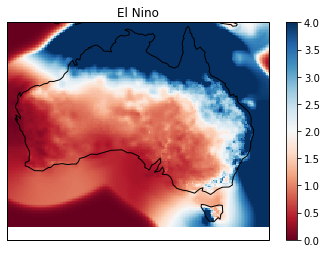

In [44]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([112, 156.2, -44.5, -10])
im = ax.pcolormesh(nino_pattern3.lon, nino_pattern3.lat, nino_pattern3, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(0, 4)
plt.colorbar(im, ax=ax)
ax.set_title('El Nino')

Text(0.5, 1.0, 'La Nina')

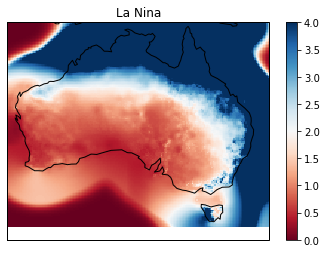

In [45]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([112, 156.2, -44.5, -10])
im = ax.pcolormesh(nina_pattern2.lon, nina_pattern2.lat, nina_pattern2, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(0, 4)
plt.colorbar(im, ax=ax)
ax.set_title('La Nina')